# Feature Engineering & Modeling

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np

In [114]:
data = pd.read_csv('data/origin/weatherQN_2021_2025.csv')
data.head()

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
0,2021-01-01 07:00:00,22.1,14.7,63.0,NaN,NaN,360.0,14.4,NaN,1017.5,NaN,NaN
1,2021-01-01 10:00:00,21.5,16.9,75.0,NaN,NaN,340.0,14.4,NaN,1018.4,NaN,NaN
2,2021-01-01 13:00:00,21.5,16.9,75.0,NaN,NaN,340.0,10.8,NaN,1017.0,NaN,NaN
3,2021-01-01 16:00:00,22.2,17.8,76.0,NaN,NaN,360.0,14.4,NaN,1016.0,NaN,NaN
4,2021-01-01 19:00:00,22.0,16.9,73.0,NaN,NaN,340.0,7.2,NaN,1017.6,NaN,NaN


In [115]:
data.shape

(35304, 12)

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35304 entries, 0 to 35303
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    35304 non-null  object 
 1   temp    35304 non-null  float64
 2   dwpt    35304 non-null  float64
 3   rhum    35304 non-null  float64
 4   prcp    35215 non-null  float64
 5   snow    0 non-null      float64
 6   wdir    35304 non-null  float64
 7   wspd    35304 non-null  float64
 8   wpgt    0 non-null      float64
 9   pres    35304 non-null  float64
 10  tsun    0 non-null      float64
 11  coco    22591 non-null  float64
dtypes: float64(11), object(1)
memory usage: 3.2+ MB


In [117]:
# Drop null columns
data.drop(columns=['snow', 'wpgt', 'tsun'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35304 entries, 0 to 35303
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    35304 non-null  object 
 1   temp    35304 non-null  float64
 2   dwpt    35304 non-null  float64
 3   rhum    35304 non-null  float64
 4   prcp    35215 non-null  float64
 5   wdir    35304 non-null  float64
 6   wspd    35304 non-null  float64
 7   pres    35304 non-null  float64
 8   coco    22591 non-null  float64
dtypes: float64(8), object(1)
memory usage: 2.4+ MB


In [118]:
data[data.isnull().any(axis=1)]

,time,temp,dwpt,rhum,prcp,wdir,wspd,pres,coco
0,2021-01-01 07:00:00,22.1,14.7,63.0,NaN,360.0,14.4,1017.5,NaN
1,2021-01-01 10:00:00,21.5,16.9,75.0,NaN,340.0,14.4,1018.4,NaN
2,2021-01-01 13:00:00,21.5,16.9,75.0,NaN,340.0,10.8,1017.0,NaN
3,2021-01-01 16:00:00,22.2,17.8,76.0,NaN,360.0,14.4,1016.0,NaN
4,2021-01-01 19:00:00,22.0,16.9,73.0,NaN,340.0,7.2,1017.6,NaN
...,...,...,...,...,...,...,...,...,...
34399,2024-12-12 19:00:00,24.4,23.5,95.0,NaN,53.0,13.0,1009.9,NaN
34400,2024-12-13 01:00:00,24.9,23.9,94.0,NaN,50.0,13.7,1010.4,NaN
34401,2024-12-13 07:00:00,24.6,23.6,94.0,NaN,43.0,15.1,1011.7,NaN
34402,2024-12-13 13:00:00,25.8,23.5,87.0,NaN,38.0,20.5,1010.4,NaN


In [119]:
# Change column time datatype
data['time'] = pd.to_datetime(data['time'])
data = data.sort_values(by='time') 

In [120]:
# Fill missing values by nearest values
data.bfill(inplace=True)

In [121]:
data[data.isnull().any(axis=1)]

,time,temp,dwpt,rhum,prcp,wdir,wspd,pres,coco


In [122]:
data.head(10)

,time,temp,dwpt,rhum,prcp,wdir,wspd,pres,coco
0,2021-01-01 07:00:00,22.1,14.7,63.0,0.2,360.0,14.4,1017.5,1.0
1,2021-01-01 10:00:00,21.5,16.9,75.0,0.2,340.0,14.4,1018.4,1.0
2,2021-01-01 13:00:00,21.5,16.9,75.0,0.2,340.0,10.8,1017.0,1.0
3,2021-01-01 16:00:00,22.2,17.8,76.0,0.2,360.0,14.4,1016.0,1.0
4,2021-01-01 19:00:00,22.0,16.9,73.0,0.2,340.0,7.2,1017.6,1.0
5,2021-01-01 22:00:00,21.0,16.6,76.0,0.2,340.0,10.8,1017.7,1.0
6,2021-01-02 00:00:00,20.0,17.4,85.0,0.2,350.0,20.2,1017.9,1.0
7,2021-01-02 01:00:00,20.0,17.8,87.0,0.2,340.0,14.4,1016.8,1.0
8,2021-01-02 02:00:00,20.1,17.5,85.0,0.1,348.0,18.7,1016.5,1.0
9,2021-01-02 03:00:00,20.0,17.8,87.0,0.2,343.0,17.6,1016.1,1.0


In [123]:
data = data[6:]
data

,time,temp,dwpt,rhum,prcp,wdir,wspd,pres,coco
6,2021-01-02 00:00:00,20.0,17.4,85.0,0.2,350.0,20.2,1017.9,1.0
7,2021-01-02 01:00:00,20.0,17.8,87.0,0.2,340.0,14.4,1016.8,1.0
8,2021-01-02 02:00:00,20.1,17.5,85.0,0.1,348.0,18.7,1016.5,1.0
9,2021-01-02 03:00:00,20.0,17.8,87.0,0.2,343.0,17.6,1016.1,1.0
10,2021-01-02 04:00:00,19.5,17.6,89.0,0.2,320.0,10.8,1015.7,1.0
...,...,...,...,...,...,...,...,...,...
35299,2025-01-20 02:00:00,17.2,16.2,94.0,0.0,274.0,16.2,1013.1,3.0
35300,2025-01-20 03:00:00,16.7,15.9,95.0,0.0,269.0,15.5,1012.7,3.0
35301,2025-01-20 04:00:00,16.3,15.7,96.0,0.0,271.0,15.5,1012.5,3.0
35302,2025-01-20 05:00:00,16.0,15.4,96.0,0.0,272.0,15.5,1012.8,3.0


In [125]:
titles = [
    'Air Temperature',
    'Dew Point',
    'Relative Humidity',
    'Total Precipitation',
    'Wind Direction',
    'Average Wind Speed',
    'Sea-Level Air Pressure',
    'Weather Condition Code'
]

feature_keys = [
    'temp',
    'dwpt',
    'rhum',
    'prcp',
    'wdir',
    'wspd',
    'pres',
    'coco'
]

colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
]

date_time_key = 'time'

In [126]:
def show_raw_visualization(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=4, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()

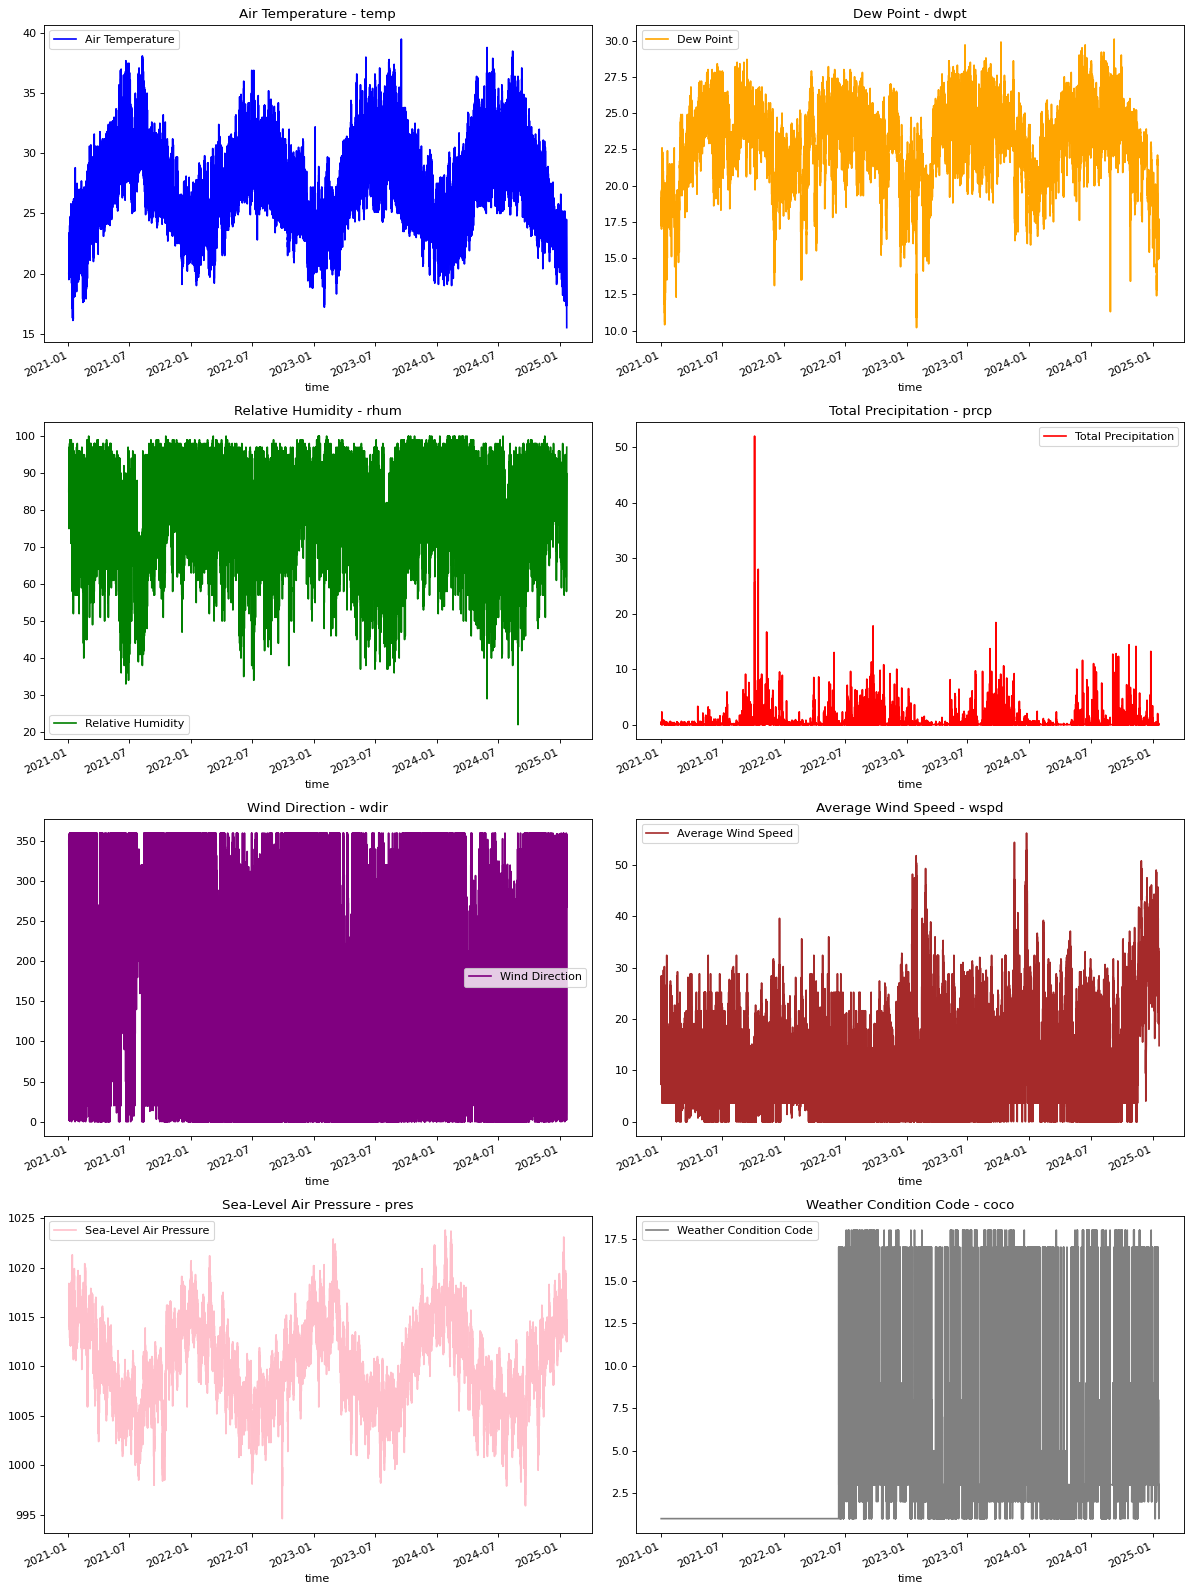

In [127]:
show_raw_visualization(data)

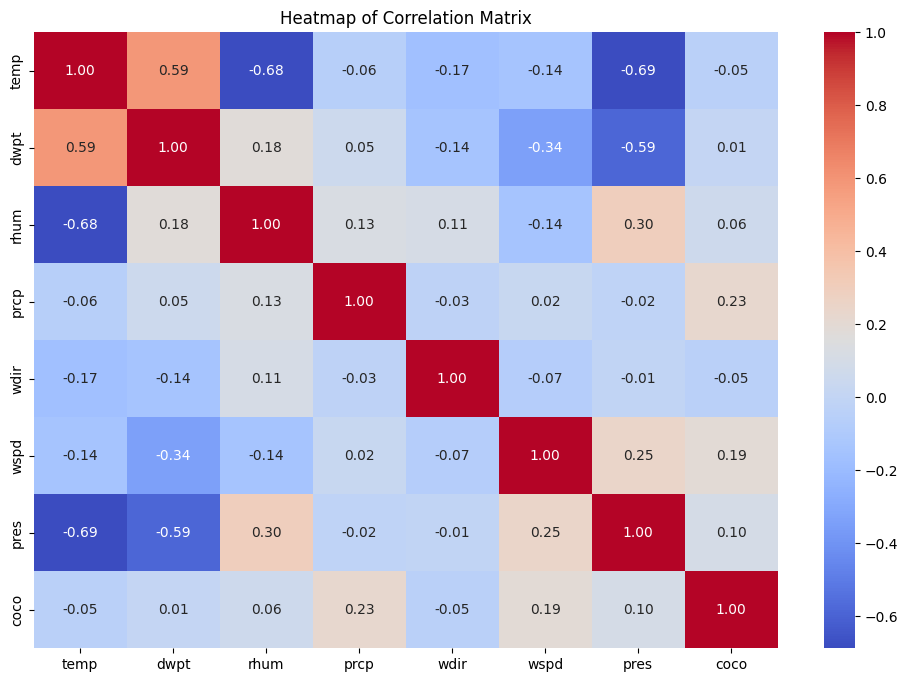

In [128]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.iloc[:, 1:].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Correlation Matrix")
plt.show()

In [129]:
split_fraction = 0.715
train_split = int(split_fraction * data.shape[0])

past = 168
future = 24
learning_rate = 0.001
batch_size = 32
epochs = 10

In [130]:
def normalize(data, train_split):
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    return (data - data_mean) / data_std

In [131]:
print(
    "The selected parameters are:",
    ", ".join([titles[i] for i in [0, 1, 2, 3, 4, 5, 6, 7]]),
)
selected_features = [feature_keys[i] for i in [0, 1, 2, 3, 4, 5, 6, 7]]
features = data[selected_features]
features.index = data[date_time_key]
features.head()

features = normalize(features.values, train_split)
features = pd.DataFrame(features)
features.head()

train_data = features.loc[0 : train_split - 1]
val_data = features.loc[train_split:]

The selected parameters are: Air Temperature, Dew Point, Relative Humidity, Total Precipitation, Wind Direction, Average Wind Speed, Sea-Level Air Pressure, Weather Condition Code


In [133]:
start = past + future
end = start + train_split

x_train = train_data[[i for i in range(7)]].values
y_train = features.iloc[start:end][[1]]

sequence_length = int(past)

In [134]:
dataset_train = tf.keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    batch_size=batch_size,
)

I0000 00:00:1737511234.571475   17523 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1977 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [135]:
x_end = len(val_data) - past - future

label_start = train_split + past + future

x_val = val_data.iloc[:x_end][[i for i in range(7)]].values
y_val = features.iloc[label_start:][[1]]

dataset_val = tf.keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    batch_size=batch_size,
)


for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (32, 168, 7)
Target shape: (32, 1)


2025-01-22 09:00:49.237522: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [136]:
inputs = tf.keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = tf.keras.layers.LSTM(32)(inputs)
outputs = tf.keras.layers.Dense(1)(lstm_out)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 168, 7)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 32)             │         5,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,153 (20.13 KB)

 Trainable params: 5,153 (20.13 KB)

 Non-trainable params: 0 (0.00 B)

In [137]:
path_checkpoint = "model_checkpoint.weights.h5"
es_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = tf.keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/10


: 

In [ ]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

In [ ]:
def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return


for x, y in dataset_val.take(5):
    show_plot(
        [x[0][:, 1].numpy(), y[0].numpy(), model.predict(x)[0]],
        12,
        "Single Step Prediction",
    )